Import the `fb_qualities` module

In [1]:
import os
import random
import fb_qualities

base_dir = "d:/soundofai/all_nsynth_audio"
files = [x for x in os.listdir(base_dir) if x.lower().endswith(".wav")]

Create and build an instance of `FBQualities` class. Building it loads default qualities and thersholds from `list_of_fb_qualities.csv`

In [2]:
path_to_sample = os.path.join(base_dir, random.choice(files))

fbq = fb_qualities.core.FBQualities()
fbq.build()

Load audio and find which categories does it belong to according to current thresholds

In [3]:
audio = fb_qualities.spectrogram.get_audio(path_to_sample)

fbq.get_ratios_for(audio)

{'thin': <tf.Tensor: shape=(), dtype=float32, numpy=0.22519824>,
 'hollow': <tf.Tensor: shape=(), dtype=float32, numpy=0.6469364>,
 'dark': <tf.Tensor: shape=(), dtype=float32, numpy=0.2664727>,
 'warm': <tf.Tensor: shape=(), dtype=float32, numpy=0.22519824>,
 'full': <tf.Tensor: shape=(), dtype=float32, numpy=0.49066252>,
 'bright': <tf.Tensor: shape=(), dtype=float32, numpy=0.4726152>,
 'muddy': <tf.Tensor: shape=(), dtype=float32, numpy=0.22519824>,
 'boxy': <tf.Tensor: shape=(), dtype=float32, numpy=0.24358067>,
 'honky': <tf.Tensor: shape=(), dtype=float32, numpy=0.41010568>,
 'harsh': <tf.Tensor: shape=(), dtype=float32, numpy=0.31624666>,
 'tinny': <tf.Tensor: shape=(), dtype=float32, numpy=0.18637301>,
 'sibilance': <tf.Tensor: shape=(), dtype=float32, numpy=0.113934204>}

We can also look at ratios for specific qualities

In [4]:
fbq.thin.get_ratio(audio)

<tf.Tensor: shape=(), dtype=float32, numpy=0.22519824>

In [5]:
fbq.bright.get_ratio(audio)

<tf.Tensor: shape=(), dtype=float32, numpy=0.4726152>

In [6]:
from tqdm import tqdm

In [7]:
names = fbq.names
results = {}

for f in tqdm(files):
    path_to_sample = os.path.join(base_dir, f)
    audio = fb_qualities.spectrogram.get_audio(path_to_sample)
    ratios = fbq.get_ratios_for(audio)
    results[f] = {}
    for name, ratio in ratios.items():
        results[f][name] = float(ratio.numpy())

  2%|▏         | 313/16644 [00:07<06:19, 43.07it/s]


KeyboardInterrupt: 

In [8]:
import json

with open("results.json", "r") as f:
    results = json.load(f)

In [9]:
for_df = dict((n, []) for n in names)

for key, value in results.items():
    for n in names:
        for_df[n].append(value[n])

In [10]:
import pandas as pd

df = pd.DataFrame(for_df)
df.head()

,thin,hollow,dark,warm,full,bright,muddy,boxy,honky,harsh,tinny,sibilance
0,0.195592,0.753406,0.182204,0.195592,0.611686,0.355851,0.195592,0.213792,0.549196,0.224653,0.160145,0.083553
1,0.140686,0.723043,0.203912,0.140686,0.527176,0.445140,0.140686,0.157146,0.548370,0.290788,0.221871,0.092676
2,0.140096,0.738509,0.180420,0.140096,0.502927,0.472588,0.140096,0.139962,0.545430,0.328962,0.266024,0.076566
3,0.102700,0.625123,0.288948,0.102700,0.422381,0.557037,0.102700,0.118421,0.467386,0.423688,0.236325,0.147881
4,0.146892,0.609717,0.307208,0.146892,0.429421,0.545643,0.146892,0.160244,0.409931,0.403703,0.206587,0.154751


In [23]:
df.to_csv("stats.csv")

In [11]:
df.describe()

,thin,hollow,dark,warm,full,bright,muddy,boxy,honky,harsh,tinny,sibilance
count,16644.000000,16644.000000,16644.000000,16644.000000,16644.000000,16644.000000,16644.000000,16644.000000,16644.000000,16644.000000,16644.000000,16644.000000
mean,0.103581,0.393625,0.476539,0.103581,0.257682,0.717776,0.103581,0.092786,0.251934,0.559264,0.192248,0.219522
std,0.109573,0.211309,0.211869,0.109573,0.189445,0.204350,0.109573,0.095144,0.159319,0.197728,0.119801,0.132538
min,0.001176,0.002244,0.111821,0.001176,0.001099,0.278250,0.001176,0.000330,0.000958,0.169508,0.002369,0.036769
25%,0.028101,0.181573,0.302404,0.028101,0.069134,0.516563,0.028101,0.019092,0.089779,0.367731,0.100681,0.133395
50%,0.056907,0.454160,0.392344,0.056907,0.222426,0.755981,0.056907,0.046655,0.260331,0.563121,0.159775,0.161815
75%,0.133338,0.588183,0.623106,0.133338,0.452019,0.918894,0.133338,0.153109,0.390032,0.752327,0.268759,0.259891
max,0.524492,0.845569,0.993686,0.524492,0.688720,0.998216,0.524492,0.381754,0.709214,0.975273,0.629771,0.822975


In [12]:
import numpy as np
import tensorflow as tf

In [13]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")

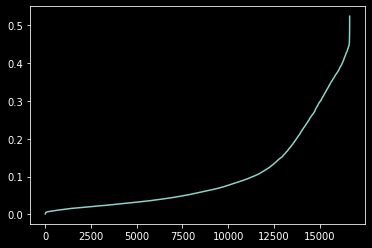

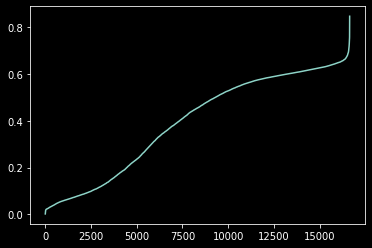

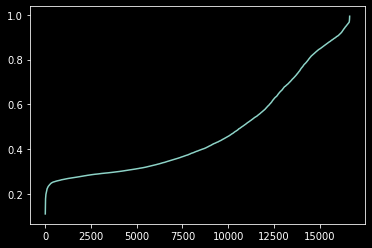

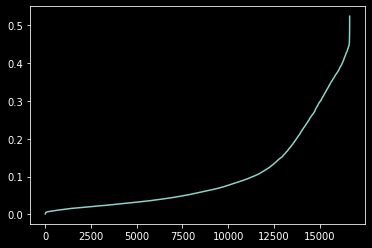

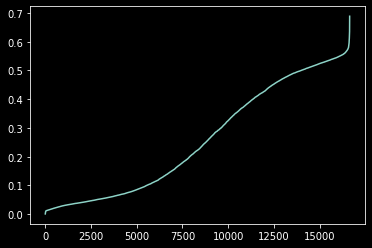

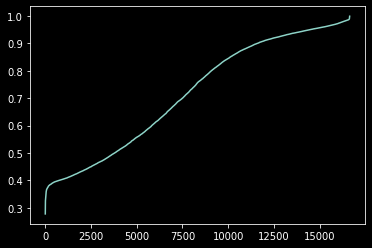

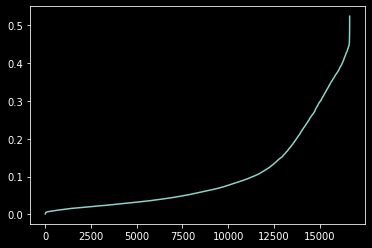

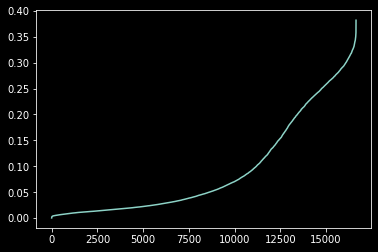

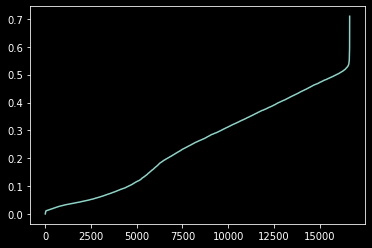

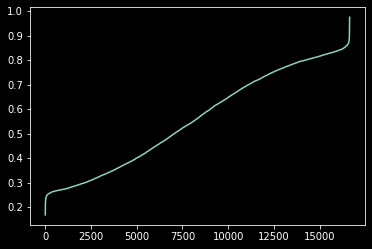

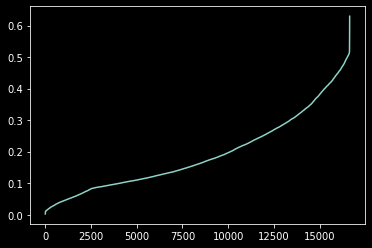

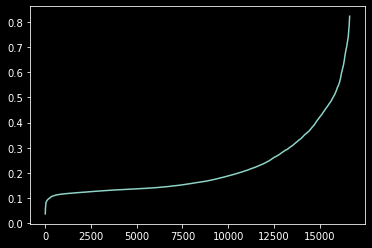

In [14]:
for n in names:
    x = df[n].values
    plt.plot(sorted(x))

    plt.show()

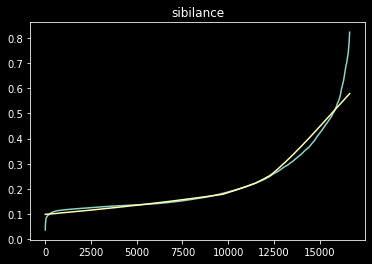

In [54]:
for n in names:
    y = np.array(list(sorted(df[n].values)))
    num = len(y)

    x = np.array(list(range(0, num))) / num

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(8, activation="relu", input_shape=(1,)),
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])

    model.compile(
        loss="mse",
        optimizer="adam"
    )

    _ = model.fit(
        x, y,
        steps_per_epoch=16,
        shuffle=True,
        epochs=100,
        batch_size=1024,
        verbose=False
    )

    p = model.predict(x)

    plt.close()
    plt.clf()
    plt.plot(y)
    plt.plot(p)
    plt.title(n)
    plt.savefig(f"{n}.png")